## SIDDHANT GEDAM


Covid19 Data Analysis 
------------------------------------------

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cdf =pd.read_csv("covid19_Confirmed_dataset.csv") # Using Dataset published by John Hopkins University
cdf.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
cdf.shape

(266, 104)

In [4]:
cdf.drop(["Lat","Long"], axis =1,inplace =True)

In [5]:
cdf.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
dfc= cdf.groupby("Country/Region").sum()

In [7]:
dfc.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
dfc.shape

(187, 100)

## Visualizing data 

Text(0.5, 1.0, 'Cases vs Country')

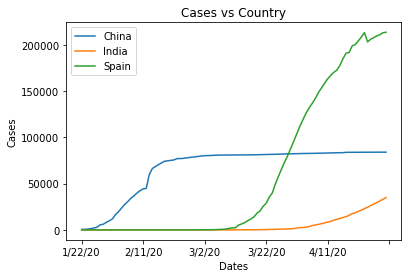

In [9]:
dfc.loc["China"].plot()
dfc.loc["India"].plot()
dfc.loc["Spain"].plot()
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title("Cases vs Country")

###  Calculating a good measure 
 

<AxesSubplot:>

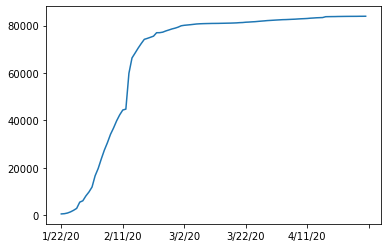

In [10]:
dfc.loc['China'].plot()

<AxesSubplot:>

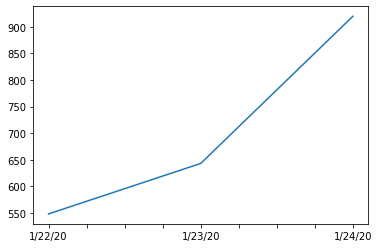

In [11]:
dfc.loc['China'][:3].plot()

### Calculating the first derivative of the curve

<AxesSubplot:>

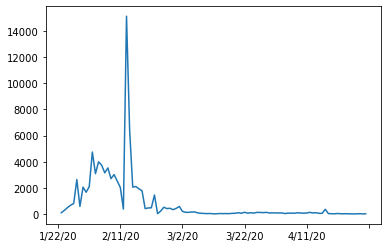

In [12]:
dfc.loc['China'].diff().plot()

###  find maxmimum infection rate for China

In [13]:
dfc.loc['China'].diff().max()

15136.0

In [14]:
dfc.loc['India'].diff().max()

1893.0

In [15]:
dfc.loc['Spain'].diff().max()

9630.0

### find maximum infection rate for all of the countries. 

In [16]:
country= list(dfc.index)
mir=list()
for i in country:
    mir.append(dfc.loc[i].diff().max())
    

dfc.loc[:,'MaxIR'] = mir
dfc['MaxIR']


Country/Region
Afghanistan           232.0
Albania                34.0
Algeria               199.0
Andorra                43.0
Angola                  5.0
                      ...  
West Bank and Gaza     66.0
Western Sahara          4.0
Yemen                   5.0
Zambia                  9.0
Zimbabwe                8.0
Name: MaxIR, Length: 187, dtype: float64

###  Create a new dataframe with only needed column 

In [17]:
newdfc = pd.DataFrame(dfc["MaxIR"])

In [18]:
newdfc.head()

,MaxIR
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Importing the dataset

In [36]:
hdf=pd.read_csv("worldwide_happiness_report.csv") # Using worldwide happiness report released by the UN

In [20]:
hdf.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


###  Droping the useless columns 

In [21]:
hdf= hdf.drop(["Overall rank","Score","Generosity","Perceptions of corruption"],axis=1)

In [22]:
hdf.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [23]:
hdf.set_index("Country or region",inplace=True)

### Joining two datasets  

#### Corona Dataset :

In [24]:
newdfc.shape

(187, 1)

#### Wolrd happiness report Dataset :

In [25]:
hdf.shape

(156, 4)

In [26]:
finaldf= newdfc.join(hdf,how='inner')

### Correlation matrix 

In [27]:
finaldf.corr()

,MaxIR,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
MaxIR,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Visualization of the results


In [28]:
finaldf.head()

,MaxIR,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Plotting GDP vs maximum Infection rate

<AxesSubplot:xlabel='GDP per capita', ylabel='MaxIR'>

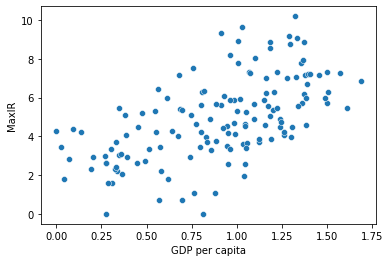

In [29]:
x=finaldf['GDP per capita']
y=finaldf['MaxIR']
sns.scatterplot(x=x,y=np.log(y),data=finaldf)

<AxesSubplot:xlabel='GDP per capita', ylabel='MaxIR'>

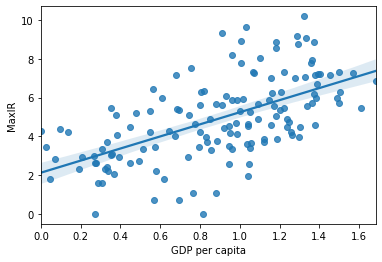

In [30]:
sns.regplot(x=x,y=np.log(y),data=finaldf)

### Plotting Social support vs maximum Infection rate

<AxesSubplot:xlabel='Social support', ylabel='MaxIR'>

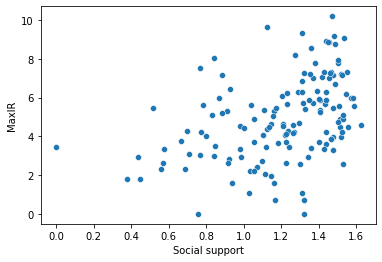

In [31]:
x=finaldf['Social support']
y=finaldf['MaxIR']

sns.scatterplot(x=x,y=np.log(y),data=finaldf)

<AxesSubplot:xlabel='Social support', ylabel='MaxIR'>

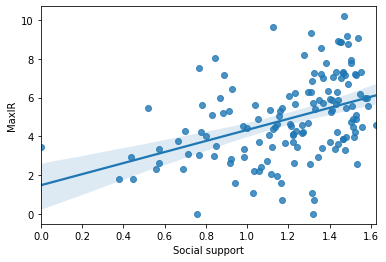

In [32]:
sns.regplot(x=x,y=np.log(y),data=finaldf)

### Plotting Healthy life expectancy vs maximum Infection rate

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='MaxIR'>

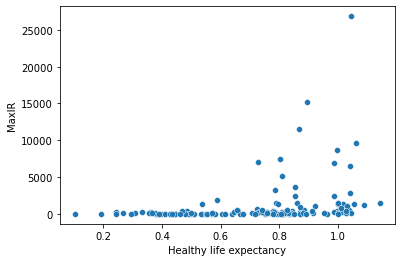

In [33]:
x=finaldf['Healthy life expectancy']
y=finaldf['MaxIR']
sns.scatterplot(x=x,y=y,data=finaldf)

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='MaxIR'>

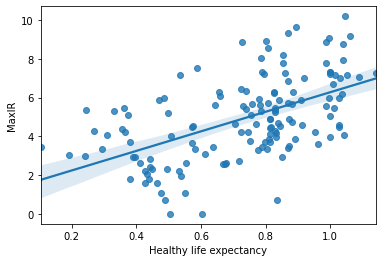

In [34]:
sns.regplot(x=x,y=np.log(y),data=finaldf)

###  Plotting Freedom to make life choices vs maximum Infection rate

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='MaxIR'>

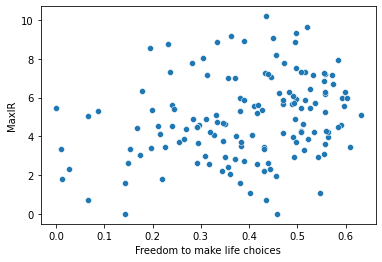

In [35]:
x=finaldf['Freedom to make life choices']
y=finaldf['MaxIR']

sns.scatterplot(x=x,y=np.log(y),data=finaldf)

### Results

Cases had a positive correlation with the GDP per capita of the countries.One reason of low cases in less GDP per capita countries can be due to the low level of testing in the less developed countries